In [50]:
with open('08.txt', 'r') as file:
    grid = [line.strip() for line in file.readlines()]

# Get dimensions
height = len(grid)
width = len(grid[0]) if height > 0 else 0

# Find all non-dot coordinates
non_dot_coords = []
for y in range(height):
    for x in range(width):
        if grid[y][x] != '.':
            non_dot_coords.append((grid[y][x], (x, y)))

print(f"Grid dimensions: {width}x{height}")
print(f"Number of non-dot elements: {len(non_dot_coords)}")
print("Non-dot coordinates:", non_dot_coords)

Grid dimensions: 50x50
Number of non-dot elements: 212
Non-dot coordinates: [('V', (11, 0)), ('b', (30, 0)), ('g', (32, 0)), ('g', (34, 1)), ('c', (29, 2)), ('T', (12, 3)), ('Z', (21, 3)), ('P', (29, 3)), ('x', (1, 4)), ('V', (26, 4)), ('P', (27, 4)), ('P', (26, 5)), ('H', (27, 5)), ('H', (17, 6)), ('Z', (23, 6)), ('g', (31, 6)), ('R', (33, 6)), ('f', (6, 7)), ('T', (19, 7)), ('V', (21, 7)), ('b', (26, 7)), ('A', (33, 7)), ('P', (22, 8)), ('f', (7, 9)), ('A', (26, 9)), ('R', (40, 9)), ('x', (8, 10)), ('T', (23, 10)), ('l', (31, 10)), ('H', (34, 10)), ('A', (40, 10)), ('c', (42, 10)), ('k', (2, 11)), ('x', (5, 11)), ('Z', (20, 11)), ('5', (8, 12)), ('S', (13, 12)), ('0', (29, 12)), ('A', (31, 12)), ('N', (13, 13)), ('L', (18, 13)), ('f', (1, 14)), ('T', (30, 14)), ('s', (39, 14)), ('N', (45, 14)), ('l', (18, 15)), ('b', (29, 15)), ('H', (30, 15)), ('t', (38, 15)), ('c', (39, 15)), ('R', (41, 15)), ('N', (44, 15)), ('Z', (6, 16)), ('6', (10, 16)), ('n', (17, 16)), ('l', (24, 16)), ('k', 

# Part 1

In [51]:
candidates = set()
for ndc in non_dot_coords:
    char, (x, y) = ndc
    potential_pairs = [x for x in non_dot_coords if x[0] == char and x != ndc]
    for pair in potential_pairs:
        distance = (x-pair[1][0], y-pair[1][1])
        # print(f"Found matching pair: {char} at {x},{y} and {pair[0]} at {pair[1]}", f"Distance: {distance}")
        other_point = (x+ distance[0],y + distance[1])
        if(other_point[0] < 0 or other_point[0] >= width or other_point[1] < 0 or other_point[1] >= height):
            continue
        candidates.add(other_point)

len(candidates)

392

# Part 2

In [52]:
candidates = set([x[1] for x in non_dot_coords])
for ndc in non_dot_coords:
    char, (x, y) = ndc
    potential_pairs = [x for x in non_dot_coords if x[0] == char and x != ndc]
    for pair in potential_pairs:
        distance = (x-pair[1][0], y-pair[1][1])
        other_point = (x,y)
        while True:
        # print(f"Found matching pair: {char} at {x},{y} and {pair[0]} at {pair[1]}", f"Distance: {distance}")
            other_point = (other_point[0]+ distance[0],other_point[1] + distance[1])
            if(other_point[0] < 0 or other_point[0] >= width or other_point[1] < 0 or other_point[1] >= height):
                break
            candidates.add(other_point)

len(candidates)

1235

In [53]:
# candidates

In [54]:
def visualize(grid, candidates):
    for y in range(height):
        for x in range(width):
            if grid[y][x] != '.':
                print(grid[y][x], end='')
            elif (x,y) in candidates:
                print('#', end='')
            else:
                print(grid[y][x], end='')
        print()

visualize(grid, [])

...........V..................b.g.................
..................................g...............
.............................c....................
............T........Z.......P....................
.x........................VP......................
..........................PH......................
.................H.....Z.......g.R................
......f............T.V....b......A................
......................P...........................
.......f..................A.............R.........
........x..............T.......l..H.....A.c.......
..k..x..............Z.............................
........5....S...............0.A..................
.............N....L...............................
.f............................T........s.....N....
..................l..........bH.......tc.R..N.....
......Z...6......n......l...k.N...0...............
...........g....S......l.r.................t..s...
..L................b.......K..t...................
................5....n........0

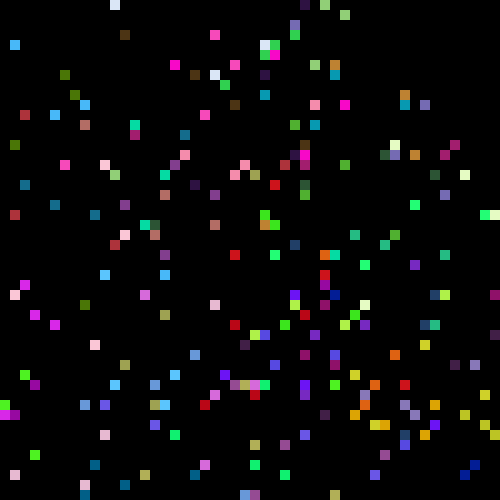

In [55]:
from PIL import Image
import numpy as np

def visualize(grid, candidates):
    height = len(grid)
    width = len(grid[0]) if height > 0 else 0
    
    # Create a new RGB image
    img = Image.new('RGB', (width, height), color='black')
    pixels = img.load()
    
    for y in range(height):
        for x in range(width):
            if grid[y][x] != '.':
                # Non-dot characters get colors based on ASCII value
                ascii_val = ord(grid[y][x])
                r = (ascii_val * 71) % 256
                g = (ascii_val * 89) % 256
                b = (ascii_val * 113) % 256
                pixels[x, y] = (r, g, b)
            elif (x,y) in candidates:
                # Candidates are white
                pixels[x, y] = (255, 255, 255)
            else:
                # Regular dots are black (already set by default)
                continue
    
    # Scale up the image to make it more visible
    scale = 10
    img_scaled = img.resize((width * scale, height * scale), Image.Resampling.NEAREST)
    
    # Display the image
    display(img_scaled)

visualize(grid, [])